# Fuzzy C-Means Clustering

Suppose we have a dataset and I have to perform fuzzy c-means clustering on them. Write  a python code for that.
 
suppose there are 200 given points. Take the input by yourself during programming. And I want to  meake c-number of clusters and some clusters may overlapp also, no problem consider it. 
also write a code to plot datasets and to make the clusters on that dattasets.

so, write a python code for this.

In [7]:
!pip3 install numpy matplotlib scikit-fuzzy scikit-learn pandas seaborn opencv-python

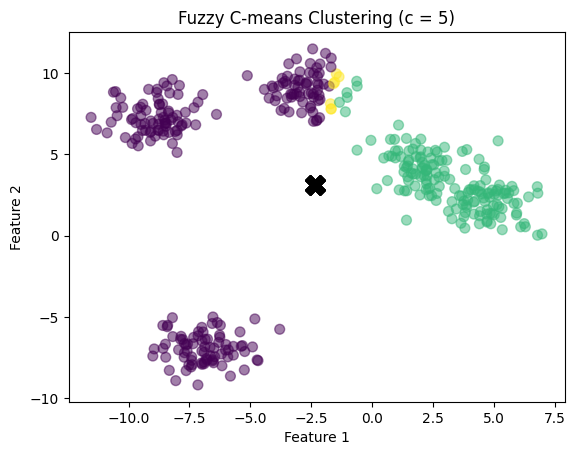

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Generate sample dataset with 200 points
X, y = make_blobs(n_samples=400, centers=5, n_features=2, random_state=42)

# Define fuzzy c-means clustering function
def fuzzy_cmeans(X, c, m, max_iter=100, tol=1e-4):
    n_samples, n_features = X.shape
    
    # Initialize membership matrix
    U = np.random.rand(n_samples, c)
    U /= np.sum(U, axis=1, keepdims=True)
    
    # Loop until convergence or max iterations reached
    for i in range(max_iter):
        # Update cluster centers
        C = np.dot(U.T, X) / np.sum(U, axis=0, keepdims=True).T
        
        # Compute pairwise distances between points and cluster centers
        D = distance.cdist(X, C, metric='euclidean')
        
        # Update membership matrix
        U_new = 1 / (1 + (D / np.expand_dims(np.min(D, axis=1), axis=1)) ** (2 / (m - 1)))
        U_new /= np.sum(U_new, axis=1, keepdims=True)
        
        # Check for convergence
        if np.linalg.norm(U_new - U) < tol:
            break
            
        U = U_new
    
    return U, C

# Perform fuzzy c-means clustering
c = 5  # Number of clusters
m = 2  # Fuzziness parameter
U, C = fuzzy_cmeans(X, c, m)

# Plot the data points and the fuzzy c-means clusters
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5, c=np.argmax(U, axis=1))
plt.scatter(C[:, 0], C[:, 1], s=200, marker='X', color='black')
plt.title("Fuzzy C-means Clustering (c = {})".format(c))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


ValueError: operands could not be broadcast together with shapes (200,2) (4,1) 

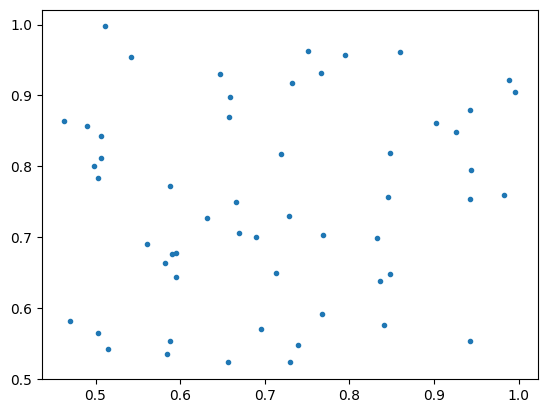

In [17]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# generate 200 data points in 2D
xpts = np.random.rand(200, 2)

# set number of clusters
c = 4

# perform fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(xpts.T, c, 2, error=0.005, maxiter=1000, init=None)

# assign points to clusters based on highest degree of membership
labels = np.argmax(u, axis=0)

# plot data points with different colors for different clusters
fig, ax = plt.subplots()
for i in range(c):
    ax.plot(xpts[labels == i, 0], xpts[labels == i, 1], '.', label=f'Cluster {i + 1}')
    circle = plt.Circle(cntr[:, i], radius=np.max(np.sum((xpts - cntr[:, i][:, None])**2, axis=0)**0.5 * u[i, :]), color='r', fill=False)
    ax.add_patch(circle)

ax.legend()
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Generate random dataset
X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=0)

# Define fuzzy c-means clustering function
def fuzzy_cmeans(X, c, m, error=1e-6, maxiter=100):
    n = X.shape[0]
    d = X.shape[1]
    U = np.random.rand(n, c)
    U /= np.sum(U, axis=1, keepdims=True)
    V = np.zeros((c, d))
    Jprev = np.inf
    for i in range(maxiter):
        V = np.dot(U.T, X) / np.sum(U, axis=0, keepdims=True).T
        D = cdist(X, V)
        U = 1 / (D ** 2 / (U ** (m - 1)).T).T
        U /= np.sum(U, axis=1, keepdims=True)
        J = np.sum(U ** m * D ** 2)
        if Jprev - J < error:
            break
        Jprev = J
    return U, V, J

# Perform fuzzy c-means clustering
c = 4
m = 2
U, V, J = fuzzy_cmeans(X, c, m)

# Assign each point to its most likely cluster
labels = pairwise_distances_argmin(X, V)

# Plot the dataset and the resulting clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(V[:, 0], V[:, 1], marker='*', s=200, c='k')
for j in range(c):
    ix = np.where(labels == j)[0]
    if len(ix) > 0:
        circle = plt.Circle((V[j, 0], V[j, 1]), radius=np.max(cdist(X[ix], [V[j]])), fill=False, linestyle='--', color='k')
        plt.gca().add_artist(circle)
plt.show()


ValueError: operands could not be broadcast together with shapes (200,4) (4,200) 

In [20]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def fuzzy_cmeans(X, c, m=2, error=1e-6, maxiter=100):
    # Initialize the cluster centers randomly
    V = X[np.random.choice(X.shape[0], c, replace=False), :]

    # Initialize the membership matrix randomly
    U = np.random.rand(X.shape[0], c)
    U /= np.sum(U, axis=1, keepdims=True)

    # Iterate until convergence or max iterations is reached
    for i in range(maxiter):
        # Compute the cluster centers
        V = np.dot(U.T, X) / np.sum(U, axis=0, keepdims=True).T

        # Compute the distance between each point and each cluster center
        D = cdist(X, V)

        # Update the membership matrix
        U_old = U
        U = 1 / (D ** 2 / np.sum((U ** (m - 1))[:, :, np.newaxis] * D ** 2, axis=1))

        # Normalize the membership matrix
        U /= np.sum(U, axis=1, keepdims=True)

        # Check for convergence
        if np.linalg.norm(U - U_old) < error:
            break

    # Compute the objective function value
    J = np.sum(U ** m * D ** 2)

    return U, V, J


# Generate sample data
np.random.seed(0)
X = np.random.rand(200, 2)

# Perform fuzzy c-means clustering
c = 4
m = 2
U, V, J = fuzzy_cmeans(X, c, m)

# Assign each point to its most likely cluster
labels = np.argmax(U, axis=1)

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(V[:, 0], V[:, 1], marker='*', s=200, c='k')

# Draw the cluster boundaries
for j in range(c):
    x1, x2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
    x = np.vstack((x1.flatten(), x2.flatten())).T
    u = 1 / (cdist(x, V[j, :][np.newaxis, :]) ** 2 / np.sum((U[:, j][:, np.newaxis] ** (m - 1)) * cdist(x, V[j, :][np.newaxis, :]) ** 2, axis=0))
    u = u.reshape((100, 100))
    plt.contour(x1, x2, u, levels=[0.5], colors='k', linewidths=1)

plt.show()


ValueError: operands could not be broadcast together with shapes (200,4,1) (200,4) 